# Overfitting e Underfitting con Decision Tree

## 🎯 Obiettivo
Analizzare il comportamento del modello Decision Tree al variare della complessità (profondità) e visualizzare i fenomeni di **overfitting** e **underfitting**.

---

## 📚 Definizioni

- **Underfitting**: il modello è troppo semplice per catturare la struttura dei dati. Ha bassa accuratezza sia su training che su test.
- **Overfitting**: il modello è troppo complesso e si adatta troppo bene ai dati di training, perdendo la capacità di generalizzare. Ha alta accuracy su training, ma bassa su test.

---

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()

train_acc, test_acc = [], []
train_f1, test_f1 = [], []
depths = range(2, 20)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))


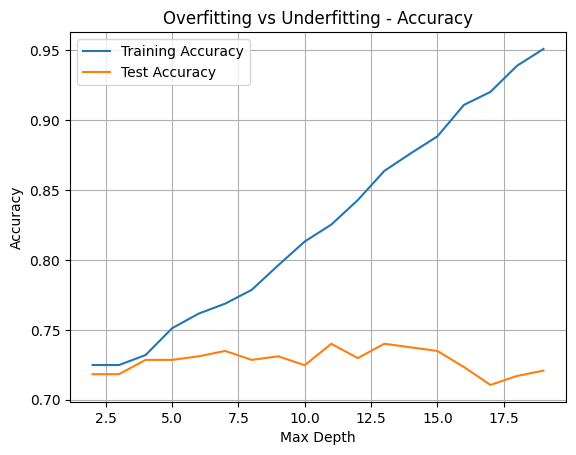

In [3]:
plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting vs Underfitting - Accuracy')
plt.legend()
plt.grid(True)
plt.show()
